<a href="https://colab.research.google.com/github/Weedmastercrucifer/diseasedetector/blob/main/Checknotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import numpy as np
print(tf.__version__)

2.4.1


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# New Section

In [3]:
#trdata=tf.keras.preprocessing.image.ImageGenerator() 
batch=20
traindata=tf.keras.preprocessing.image_dataset_from_directory(directory="/gdrive/MyDrive/trainset",image_size=(224,224),batch_size=batch,label_mode='binary',shuffle=True)
#tsdata=tf.keras.preprocessing.image.ImageGenerator()
testdata=tf.keras.preprocessing.image_dataset_from_directory(directory="/gdrive/MyDrive/testset",image_size=(224,224),batch_size=batch,label_mode='binary',shuffle=True)
#testing=tf.keras.preprocessing.image_dataset_from_directory(directory='/gdrive/MyDrive/smalltrain',image_size=(224,224))

Found 1520 files belonging to 2 classes.
Found 304 files belonging to 2 classes.


In [4]:
print(len(traindata))
print(len(testdata))

76
16


In [5]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))) 


In [6]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=4096,activation="relu")) 
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=4096,activation="relu")) 
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [7]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [9]:



checkpoint = tf.keras.callbacks.ModelCheckpoint("vgg16_1.h5",monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')

hist = model.fit(traindata,steps_per_epoch=(1520//batch), validation_data= testdata, validation_steps=(304//batch),epochs=100,callbacks=[checkpoint])

Epoch 1/100
76/76 [==============================] - 544s 6s/step - loss: 286.5822 - accuracy: 0.5311 - val_loss: 0.7184 - val_accuracy: 0.5333

Epoch 00001: val_accuracy improved from -inf to 0.53333, saving model to vgg16_1.h5
Epoch 2/100
76/76 [==============================] - 33s 427ms/step - loss: 0.7275 - accuracy: 0.5253 - val_loss: 0.6939 - val_accuracy: 0.4700

Epoch 00002: val_accuracy did not improve from 0.53333
Epoch 3/100
76/76 [==============================] - 32s 413ms/step - loss: 0.7467 - accuracy: 0.5411 - val_loss: 1.0207 - val_accuracy: 0.4667

Epoch 00003: val_accuracy did not improve from 0.53333
Epoch 4/100
76/76 [==============================] - 32s 413ms/step - loss: 1.1438 - accuracy: 0.5367 - val_loss: 0.4817 - val_accuracy: 0.7833

Epoch 00004: val_accuracy improved from 0.53333 to 0.78333, saving model to vgg16_1.h5
Epoch 5/100
76/76 [==============================] - 32s 417ms/step - loss: 0.7775 - accuracy: 0.5836 - val_loss: 0.4433 - val_accuracy: 0.

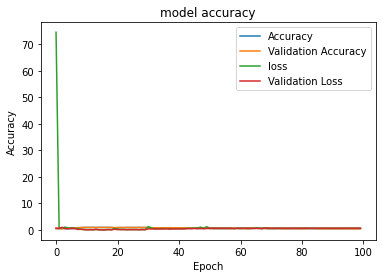

In [10]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

Covid19


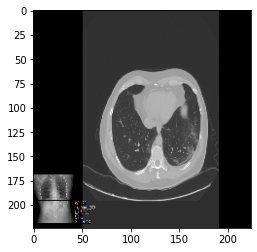

In [20]:
model=tf.keras.models.load_model("vgg16_1.h5") 
#tf.keras.models.save_model(model,'/gdrive/MyDrive/models',overwrite=False,include_optimizer=True)
img=tf.keras.preprocessing.image.load_img("/gdrive/MyDrive/images/16745_6_2.png", target_size=(224,224))
img=np.asarray(img)
plt.imshow(img)
img=np.expand_dims(img,axis=0)
output=model.predict(img)
if output<0.5:
  print("Covid19")
else: 
  print("Non Covid19")